Description

Context:
DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are tasked with coming up with a policy framework by looking at the data government got from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government.
 

Problem:
The dataset aims to answer the following key questions:

What are the different factors that influence the income of an individual?

Is there a good predictive model for income that exists? What does the performance assessment look like for such a model?

# Importing the necessary Libraries

In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install sketch

Defaulting to user installation because normal site-packages is not writeable


In [3]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
ngo_data = pd.read_csv("who_data.csv")  # To read in the given dataset

In [6]:
ngo_data.head(10)       # to get the first five values of the dataset

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
ngo_data.shape                 # This displays the shape of the data

(32561, 15)

Observation
- There are 32561 rows and 15 columns in the data

In [8]:
ngo_data.info()         # Displays the basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

Observation
- There are six integers and nine strings as the data types.
- There are no null values.

In [9]:
# To display the null values in the dataset
ngo_data.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

In [10]:
ngo_data.duplicated().sum()    # Displays the number of duplicates in the data.

24

Observation

- There are no null values in the data
- There are 24 duplicates in the data which will addressed during data cleaning

In [11]:
# Displaying the statistical information of the data

ngo_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_no_of_years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [12]:
df =  ngo_data.copy() # to make a copy of the original dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

Observation
- A function was written to convert or replace the value of salary to 0 and 1 which will also change the data type to inetger
- The values of >50k was converted to 0's while <=50k to 1's

#  Visualization

- Univariant Analysis

<Figure size 1200x800 with 0 Axes>

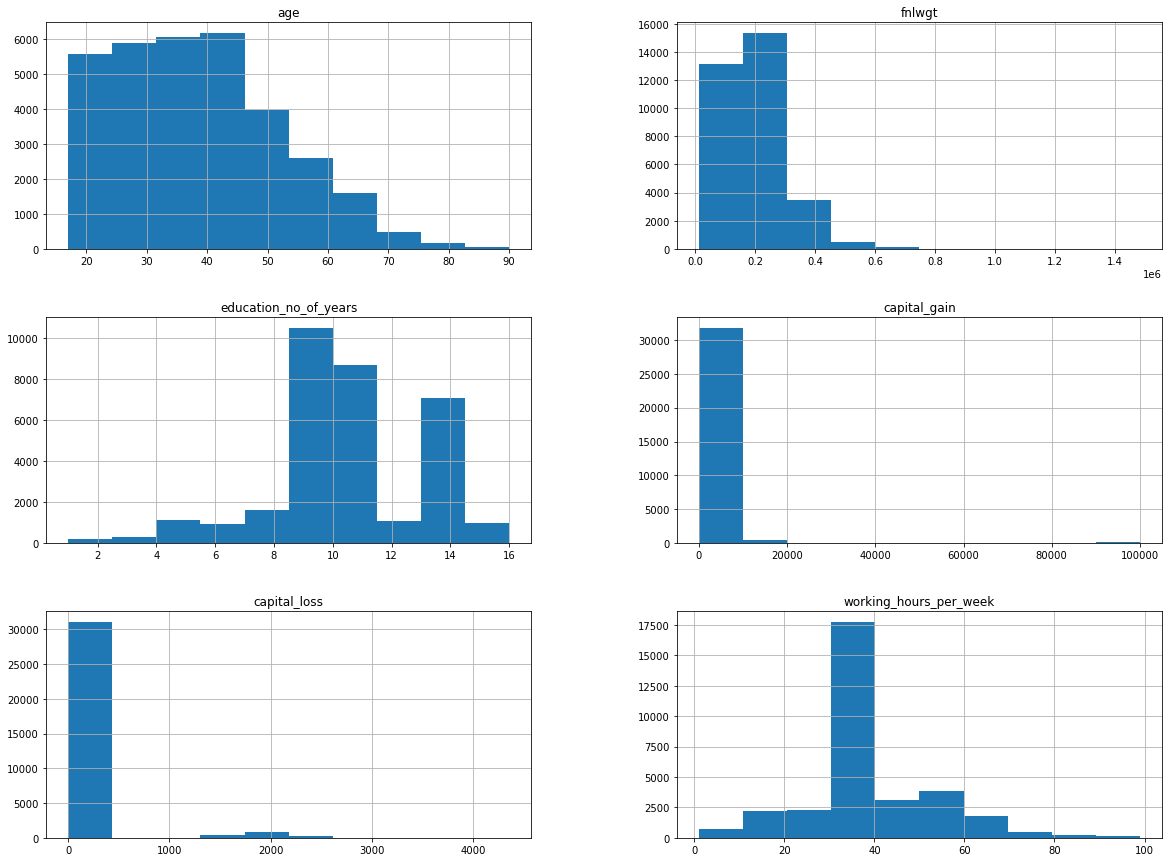

In [14]:
plt.figure(dpi=200)
df.hist(figsize = (20,15))
plt.show()

In [15]:
# using utils functions to visualize

from utils import histogram_boxplot,labeled_barplot

<Figure size 1440x720 with 0 Axes>

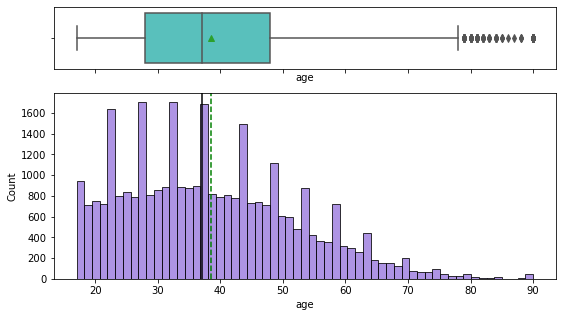

In [16]:
plt.figure(figsize= (20,10));
histogram_boxplot(df, "age")

<Figure size 1440x720 with 0 Axes>

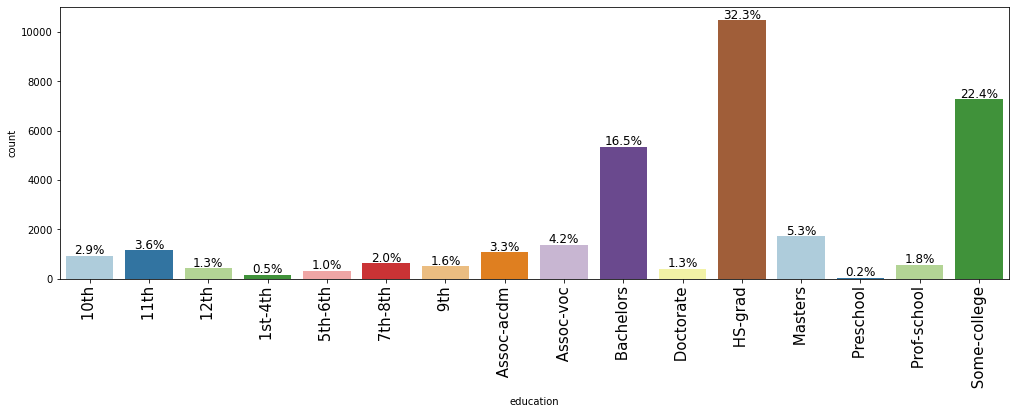

In [73]:
plt.figure(figsize= (20,10));
labeled_barplot(df, "education", perc=True)

Observation
- It can be depicted that the Civilian married spouse has the highest range of age at 50
- The range of the widowed age is around 65 years as the highest.

In [18]:
df['workclass'] = df['workclass'].replace({' ?':'No-class'}) # The category with no work class was replaced with No_class

<Figure size 1440x576 with 0 Axes>

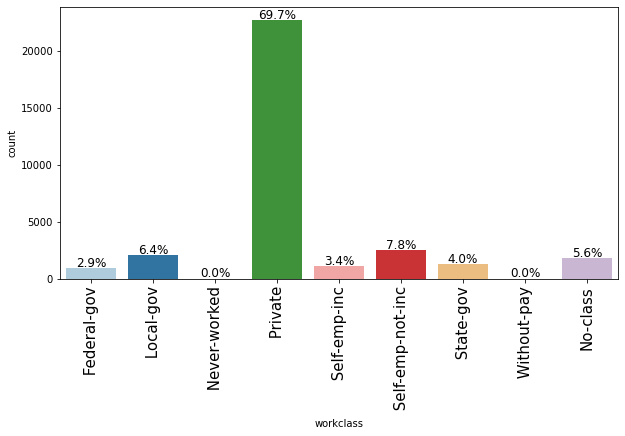

In [19]:
plt.figure(figsize=(20,8));
labeled_barplot(df,'workclass', perc=True)

In [20]:
df["workclass"].unique()   ## This displays the unique values of workclass

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'No-class', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Observation

- The Married-civ-spouse has the highest number as against other status.
- From the workclass dataset the private sector has the highest number.
- In the age dataset, the range of working class falls within 28 - 50 years, while the least age is 18

# Bivariant Analysis

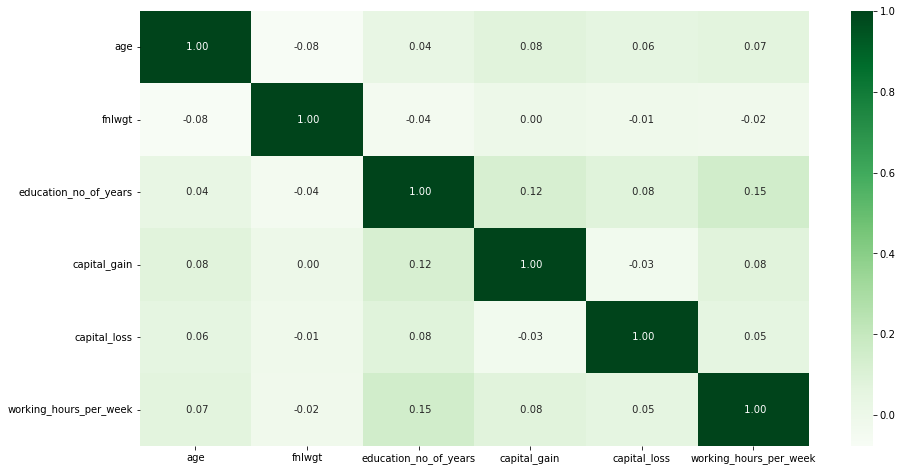

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, fmt=" .2f", cmap= "Greens")
plt.show()

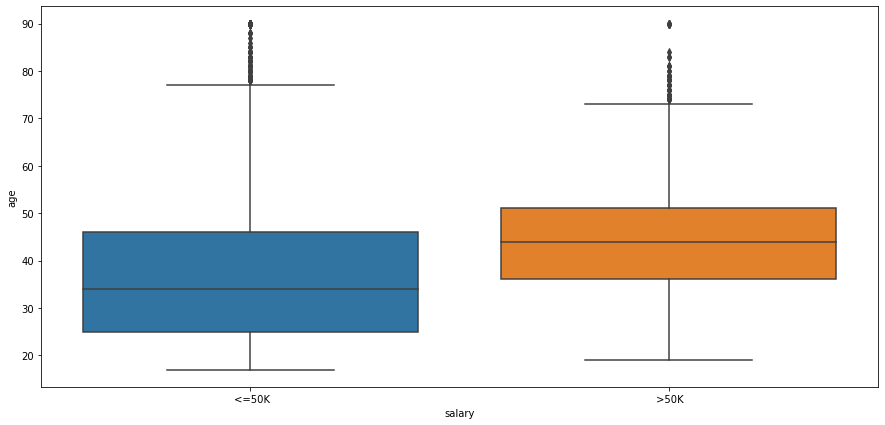

In [22]:
plt.figure(figsize=(15, 7))
sns.boxplot(y="age", x="salary", data=df)
plt.show()

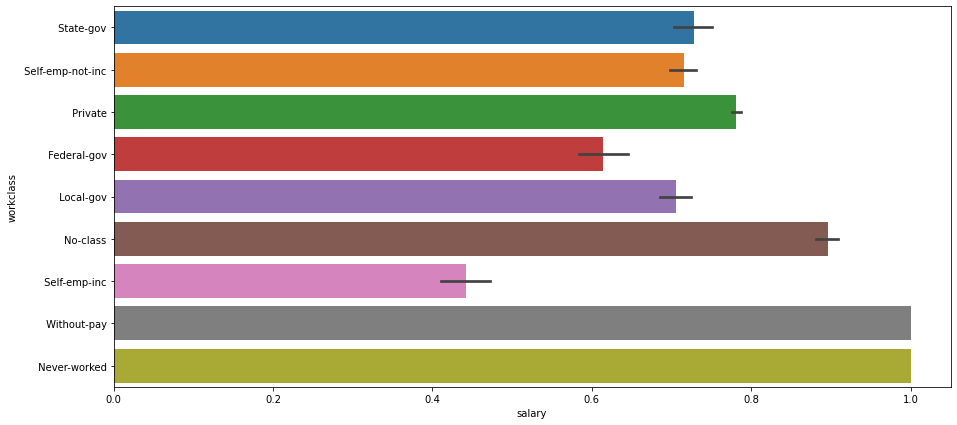

In [72]:
plt.figure(figsize=(15, 7))
sns.barplot(y="workclass", x="salary", data=df)
plt.show()

# Data Cleaning

In [24]:
# defining a function to categorize the salary into 0 and 1
def salary_val (digits):
    if digits == " <=50K":
        digits = 1
    else:
        digits = 0
    return digits     

In [25]:
df['salary'] = df['salary'].apply([salary_val])     

In [26]:
df.head()    # displaying the top 5 data with the converted numeric salary value

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [27]:
df.describe().T  # displaying the statistical description after converting the salary column to interger

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_no_of_years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
salary,32561.0,0.759190,0.427581,0.0,1.0,1.0,1.0,1.0


In [28]:
# Dropping the duplicates in the datset
df.drop_duplicates(inplace=True)   

In [29]:
df.duplicated().sum()

0

# Selecting the features and Targets

In [30]:
x= df.drop(["race", "salary", "relationship","native_country","occupation","education_no_of_years","workclass"], axis=1)
y = df["salary"]   # dropping the target and the features not important for the model

In [31]:
# Getting the one hot encoding for the 
x = pd.get_dummies(x,drop_first=True)

In [32]:
# Getting the new columns and rows
x.shape 

(32537, 27)

In [33]:
# Splitting the data

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y);

# Logistic Regression

In [34]:
# Scaling the train and test data before training the model
scaler= StandardScaler()

x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [35]:
# training the model by passing the scaled train and target data

logis_reg = LogisticRegression(random_state=0)
logis_reg.fit(x_train_sc, y_train)
                                    # Building our logistic regression model

LogisticRegression(random_state=0)

In [36]:
logis_reg

LogisticRegression(random_state=0)

In [37]:
# to print the accuracy score after passing both the train and test data
print("Train performance: {:.3f}". format(logis_reg.score(x_train_sc, y_train)))
print("Test performance: {:.3f}".format(logis_reg.score(x_test_sc, y_test)))

Train performance: 0.844
Test performance: 0.839


In [38]:
# to get the precision score using the predicted data and the target
test_prediction = logis_reg.predict(x_test_sc)
precision = precision_score(y_test,test_prediction)
print("Precision_score: {:.3f}". format(precision_score(y_test,test_prediction)))

Precision_score: 0.868


Observation
- Out of all the individuals predicted to be earning less than 50K, the model predicted
87% correctly.

In [39]:
# To get the recall score
recall = recall_score(y_test,test_prediction)
print("Recall_score: {:.3f}". format(recall_score(y_test,test_prediction)))

Recall_score: 0.928


Obersvation
- Out of the individuals predicted to be earning less than 50k, the model
  predicted approximately 93% correctly

In [40]:
# to get the f1 score
f1 = f1_score(y_test,test_prediction)
print("f1_score: {:.3f}". format(f1_score(y_test,test_prediction)))

f1_score: 0.897


In [41]:
# importing the function to train the model and compute the accuracy
def train(model, X, y):
    trained_model = model.fit(X,y)   #training the model
    preds = trained_model.predict(X)  # making prediction
    acc = accuracy_score(y,preds)    # computing accuracy
    print(f"Train accuracy: {acc}")
    return trained_model

In [42]:
# importing the function to evaluate the trained model
def evaluate(model,X,y ,threshold = 0.5):
    """
    Function to evaluate the model with different metrics
    
    model: trained model (classifier)
    X: validation features
    y: target in validation data
    
    threshold: value to filter predictions
    """
    
    pred_proba = model.predict_proba(X)[:, 1]           # getting the prediction of the probability, 
    pred_class = np.round(pred_proba> threshold)        # converting to class cos if the prob is less than 0.5 convert to 0, viceversa
    acc = accuracy_score(y, pred_class)
    recall = recall_score(y, pred_class)
    precision = precision_score(y, pred_class)
    f1 = f1_score(y, pred_class)
    
    df =  pd.DataFrame({                                  # Note the key will be the column name and values will be the rows
          "Accuracy": acc,
          "Precison": precision,
          "Recall" : recall,  
          "F1": f1
    },    index = [0])                                      #the index is zero cos it is just one row
    
    conf = confusion_matrix(y, pred_class, labels = [0,1])                         
    disp = ConfusionMatrixDisplay(conf, display_labels = [0,1]) # this is for display label for confusin matrix plot
    disp.plot()                                                 # to display the plot
    plt.show()
        
    return df

In [43]:
# to train the model using the train function passing the scaled trained and trained target
logis_reg_newmodel = train(logis_reg,x_train_sc,y_train)

Train accuracy: 0.84403951701427


In [44]:
#importing the 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

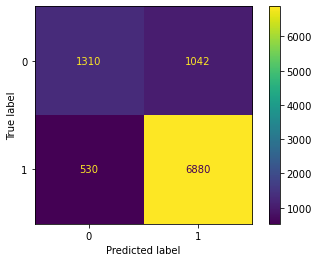

In [45]:
#evaluating the trained model
logis_reg_new = evaluate(logis_reg_newmodel,x_test_sc, y_test)

Observation on Confusion Matrix
- Out of 7410 individuals that the model predicted to be earning below 50k, 6880 was predicted correctly to be earning below 50k as their income
  while out of 2352 individals that the model predicted not to be earning below 50k, 1042 was predicted to be earning below 50k as salary.

In [46]:
logis_reg_new

,Accuracy,Precison,Recall,F1
0,0.838967,0.868468,0.928475,0.897469


# Improving the Model

In [ ]:
Approach to use to improve the model: 

- With the Balancing the data

In [47]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [48]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [49]:
#using the balance data function
def balance_data(x,y,smote_type):
    x_res,y_res = smote_type.fit_resample(x,y)
    return x_res,y_res

In [61]:
# balancing the data
under = RandomUnderSampler(random_state=0)
over =  RandomOverSampler(random_state=0)
smote= SMOTE(random_state=0)
adasyn = ADASYN(random_state=0)

x_train_under, y_train_under = balance_data(x_train_sc,y_train,under)
x_train_over,y_train_over=balance_data(x_train_sc,y_train,over)
x_train_som,y_train_som = balance_data(x_train_sc,y_train,smote)
x_train_adasyn,y_train_adasyn=balance_data(x_train_sc,y_train,adasyn)

Train accuracy: 0.8120748299319728


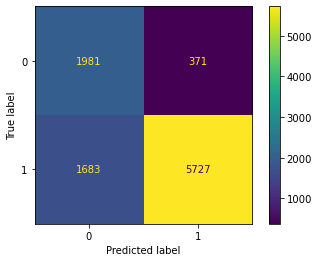

,Accuracy,Precison,Recall,F1
0,0.789592,0.93916,0.772874,0.847942


In [64]:
# passing the untrained model using undersampling
logis_reg_under = train(logis_reg,x_train_under, y_train_under)
df_under = evaluate(logis_reg_under,x_test_sc, y_test)
df_under

Train accuracy: 0.8095141700404859


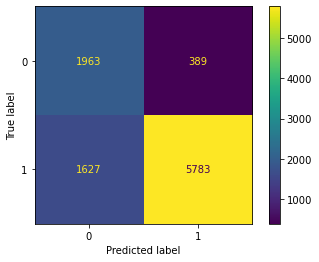

,Accuracy,Precison,Recall,F1
0,0.793485,0.936973,0.780432,0.851568


In [65]:
#Balancing the data using oversampling
logis_reg_over = train(logis_reg,x_train_over, y_train_over)
df_over = evaluate(logis_reg_over,x_test_sc, y_test)
df_over

- The recall value improved on the oversampling

Train accuracy: 0.8134278002699056


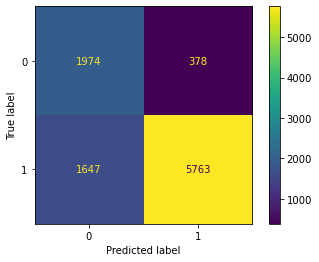

,Accuracy,Precison,Recall,F1
0,0.792563,0.938447,0.777733,0.850565


In [66]:
#Balancing the data using oversampling
logis_reg_som = train(logis_reg,x_train_som, y_train_som)
df_som = evaluate(logis_reg_som,x_test_sc, y_test)
df_som

Train accuracy: 0.7749818373951523


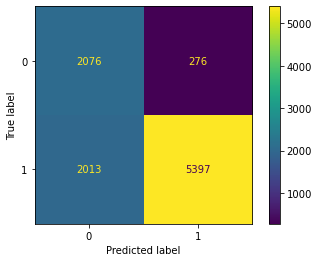

,Accuracy,Precison,Recall,F1
0,0.765519,0.951348,0.72834,0.82504


In [67]:
logis_reg_adasyn = train(logis_reg,x_train_adasyn, y_train_adasyn)
df_adasyn = evaluate(logis_reg_adasyn,x_test_sc, y_test)
df_adasyn

## Recommendations based on the Problem

- Based on the distribution between the workclass and salary, it can be depicted that
  workclass contributed immensely to the salary,though there was a class with "No other"
  the private sector easrned more than and no class was under paid.
- It can be oberserved that the working class age are paid less than 50k usd perannum,
  this could result in purchasing power, making it harder for them to afford basic amenities
  It is important for the government to consdier potential consequences of policies that could impact
  the livelihoods of the citizens negatively.The government need to support polocies that
  will have positive outcomes for all individuyals.
- Based on the models developed, the default model had a good prediction for the
  the income that exist as it predicted the number of individualks that eran less 
  than 50k usd correctly with a reduced number of wrong prediction(false negatives)  
- From the performance assessment, the confusion matrix depicts the prediction correctky to an extent
  with reduced number of errors as the recall score is quiet high which explains
  values of false negatives is low.

    
  
    
    